## LINMA1702 - Projet
# Utilisation optimale d'une pompe à chaleur domestique

###  Notebook pour le rapport final - version 2.1
### <font color="red">Numéro du groupe : 13</font>
### <font color="red">Membres du groupe : 
Simon Cornelis (<i>noma : 55101700</i>)<br>
Nicolas Jeanmenne (<i>noma : 48741900</i>)<br>
Corentin Libert (<i>noma : 53511700</i>)<br>
Aymeric Wibo (<i>noma : 74822100</i>)<br></font>

## Description générale

Une pompe à chaleur permet de chauffer un bâtiment en consommant moins d'énergie qu'au chauffage électrique classique, grâce à un coefficient de performance (COP) supérieur à un. Elle peut également fonctionner de façon réversible, c'est-à-dire qu'elle permet de refroidir en été.

Dans ce projet, on va utiliser une pompe à chaleur pour maintenir le température intérieur d'un bâtiment dans une plage confortable, tout en minimisant le coût de l'électricité consommée.

### Hypothèses et données
- On considère une année entière, qu'on discrétise par intervalles de temps d'une durée de 15 minutes
- Le bâtiment est situé à Montréal, et on dispose de la température extérieure durant chaque intervalle de temps 
- On suppose que la température du bâtiment est homogène, et on s'intéressera uniquement à la valeur qu'elle prend toutes les 15 minutes (on ne s'intéresse donc pas à la dynamique de la température au cours d'un intervalle de temps)
- Durant chaque intervalle de temps la température intérieure évolue en fonction la température externe : la différence de température entre le début et la fin d'un intervalle de temps est proportionnel à la différence entre la température externe et la température interne (le coefficient de proportionnalité dépendant de l'isolation du bâtiment)
- Pendant chaque intervalle de temps on peut choisir d'activer la pompe à chaleur. Plus précisément, on peut décider de la puissance qu'on va utiliser pour la pompe à chaleur, jusqu'à une certaine puissance maximale. Celle-ci va alors prélever de la chaleur extérieure et la transférer à l'intérieur du bâtiment (ou l'inverse si on décide de fonctionne en mode refroidissement, nommé "reverse"). La quantité de chaleur transférée est proportionnelle à la puissance électrique consommée, mais aussi au coefficient de performance (COP).
- La variation de la température du bâtiment causée par l'activation de la pompe à chaleur est proportionnelle à la chaleur/énergie transférée
- Le coefficient de performance de la pompe à chaleur est supposé dépendre uniquement de la température extérieure et du mode de fonctionnement, normal ou reverse.
- Le coût unitaire de l'électricité consommée dépend de l'heure où elle est prélevée (tarif bi-horaire)
   
### Remarque à propos de la modélisation
En général, quand on modélise un problème, on décide d'effectuer certaines hypothèses et/ou approximations. Il y a certainement plusieurs façons tout à fait valides de modéliser le problème, donc pas pas forcément une unique bonne réponse. Vous pouvez interpréter l'énoncé de la façon qui vous convient le mieux du moment qu'elle reste raisonnable. 
(par exemple : l'énoncé suggère de ne pas analyser/de prendre en compte ce qui se passe à l'intérieur d'un intervalle de temps, ce qui est un choix ; aussi : le fonctionnement simultané en mode chauffage et reverse pourrait être a priori permis ou interdit, mais cela change-t-il vraiment les choses ?)

## Tâches

**Tâche 1** : on souhaite dans un premier temps que la température du bâtiment reste comprise dans une certaine plage admissible de températures, et on cherche à **minimiser le coût total de l'électricité consommée par la pompe à chaleur**. Formulez ce problème comme un problème d'optimisation linéaire, puis résolvez le.

Pour des raisons de temps de calcul, votre modèle considérera uniquement une période de 7 jours consécutifs. Il fera l'hypothèse que la température initiale au début de la période est égale à la valeur centrale de la plage admissible, et fera en sorte que la température finale à la fin de la période revienne à la même valeur. Votre code prendra donc en entrée un paramètre indiquant le numéro de l'intervalle de temps qui début la période, qui s'étendra sur $7 \times 24 \times 4 = 672$ intervalles de temps.

<div class="alert alert-block alert-warning"><b>A mentionner</b> :<br> 
- coût minimal + graphique de l'évolution des températures + graphique représentant l'utilisation de la pompe à chaleur (en distinguant le fonctionnement normal du fonctionnement _reverse_) + temps de calcul + bref commentaire (maximum 4 lignes)<br>
- pour deux périodes distinctes (placer les résultats côté à côté) : à gauche une période pré-déterminée (cf. fichier de données), et à droite une seconde période que vous choisirez en fonction de son intérêt
</div>

---

#### Commentaires
Afin d'optimiser le coût minimal, la pompe à chaleur a tendance à chauffer/refroidir au préalable la pièce pendant les heures creuses plus que nécessaire afin de d'anticiper une forte diminution/augmentation des températures pendant les heures pleines. 
            
Ceci permet de limiter l'utilisation de la pompe à chaleur lorsque le prix de l'électricité est plus cher. Ce comportement se traduit par des piques d'utilisation de la pompe (et donc des piques de variation des températures).

<div class="alert alert-block alert-info"><b>Question 1.1</b> :<br> 
    Donnez votre formulation linéaire, en commentant brièvement (en particulier si vous utilisez une technique de modélisation/reformulation).
</div>

## Variables

Nous avons différencié le mode **normal** du mode **reverse** en créant deux vecteurs $\mathbf{X_N} \in \mathbb{R}^{672}$ et $\mathbf{X_R} \in \mathbb{R}^{672}$, représentant respectivement la consommation en kWh de la pompe à chaleur pour un intervalle en mode **normal** et en mode **reverse**. 

Nous avons aussi, par soucis de simplicité, crée une varible $\mathbf{T} \in \mathbb{R}^{672}$ représentant la température intérieur à la fin de chaque intervalle.

Nous obtenons donc un total de $3 * 672 = 2016$ variables. 

## Fonction objectif

Nous souhaitons minimiser le coût total de l'électricité consommée par la pompe à chaleur. Sous notation mathématique : 

$$ minimiser \;\; \sum_{i=1}^{672} p * (X_n + X_r) $$
où: 
 - $p$ est le vecteurs des prix en fonction de la plage horaire des intervalles dans $X_N$ et $X_R$ (tarif bi-horaire: 0,18  $\$$/kWh ou 26 $\$$/kWh).
 - $X_N$ et $X_R$ sont définis comme dans la section [Variables](#Variables).
 
## Contraintes

Nous devons optimiser la fonction objectif sous les contraintes suivantes : 
- La consomation de la pompe à chaleur ne peut pas être inférieure à 0 kWh.
- La température intérieur (à la fin de chaque intervalle) doit se trouver dans la plage admissible $[T_{min}, T_{max}]$: 
$$ T_{min} \leq T \leq T_{max}$$
Le vecteur $T_{int}$ est calculé comme suit:
$$
\left\{
\begin{align} 
T_{i+1} &= t\_variation(T_{i}, T_{ext, i}) + 0.4 * cop_{normal, i+1} * X_{N, i+1} - 0.4 * cop_{reverse} * X_{R, i+1} \\
T_{0} &= t\_variation(\frac{t_{max}+t_{min}}{2}, T_{ext, 0}) + 0.4 * cop_{normal, 0} * X_{N, 0} - 0.4 * cop_{reverse} * X_{R, 0}
\end{align}
\right.
$$
Où:
  * $t\_variation$ correspond à la fonction calculant la variation de la température intérieur en fonction de la température extérieur sur un intervalle.
  * $cop_{normal}$ est un vecteur reprenant les coefficient de performance pour le mode normal, basé sur la température extérieure
  * $cop_{reverse}$ est le coefficient de performance pour le mode reverse (constant).
  
$T$ prend donc en compte le futur, permettant par exemple d'anticiper pendant les heures creuses une variation des températures dans les heures pleines qui vont suivre (et économiser de l'argent). 
- Nous devons ajouter une contrainte vérifiant que la consommation électrique totale maximale de la pompe à chaleur ne dépasse pas **1kWh**, soit **0.25kW par intervalle de 15 minutes**: $$ 0 \leq X_{N, i} + X_{R,i} \leq \frac{1}{4} \text{ kWh} $$

- On ajoute finalement la contrainte pour que la température finale du dernier intervalle vaut $\frac{(T_{max}+T_{min})}{2}$ (cf. consignes):
$$ T[671] = \frac{(T_{max}+T_{min})}{2}$$

Ceci nous fait un total de $2 * (3 * 672) + 672 + 1 = (7 * 672) + 1$ contraintes. Nous faisons comme hypothèse que la température initiale du premier intervalle de temps est dans la plage de température admissible (cf. consignes).

<div class="alert alert-block alert-info"><b>Question 1.2</b> :<br> 
    Résolvez votre modèle sur les deux intervalles de temps, affichez vos résultats sous forme graphique et commentez.
</div>

In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time

data_vector = np.load('../part-1/data/Temperatures-Montreal.npy')

def get_end_temp(t_start, t_ext, eta=0.99):
    return (1 - eta) * (t_ext - t_start) + t_start

def get_end_interval_temperature(t_start, t_ext, eta=0.99):
    return (1 - eta) * (t_ext - t_start) + t_start

def get_var_temp_normal_mode(Xn, t_ext):
    return cp.multiply(3 + 10 * np.abs(np.tanh(t_ext/100)) * np.tanh(t_ext/100), 0.4 * Xn)

def get_var_temp_reverse_mode(Xn):
    return 3.2 * 0.4 * Xn
    
def get_temp_data(data, index, size=672):
    return data[index:index+size]

def get_price_by_interval(index, size, p_peak, p_off_peak):
    prices = [p_off_peak]*28 + [p_peak]*60 + [p_off_peak]*8
    prices = prices[index % 96:] + prices[:index % 96]
    return prices * int(size/96)

def temperature_graph(T, t_min, t_max, title, filename):
    plt.figure(figsize=(10, 6), dpi=80)
    plt.plot(T)
    plt.axhline(y=t_max, color='r', linestyle='--', label='t_max')
    plt.axhline(y=t_min, color='r', linestyle='--', label='t_min')
    plt.title(title)
    plt.xlabel('Intervalles (de 15 minutes)')
    plt.ylabel('Température (en °C)')
    plt.legend(loc=1, bbox_to_anchor=(1, 0.925))
    plt.savefig(filename, format="pdf", bbox_inches="tight")
    plt.show()
    
def pump_graph(Xn, Xr, title, filename):
    plt.figure(figsize=(10, 6), dpi=80)
    plt.plot(Xn, '-r', label='mode normal')
    plt.plot(Xr, '-b', label='mode reverse')
    plt.axhline(y=0.25, color='g', linestyle='--', label='consommation max\npar intervalle')
    plt.title(title)
    plt.xlabel('Intervalles (de 15 minutes)')
    plt.ylabel('Consommation électrique (en kW par intervalle)')
    plt.legend(loc=1, bbox_to_anchor=(1, 0.925))
    plt.savefig(filename, format="pdf", bbox_inches="tight")
    plt.show()

In [2]:
def task1(data, index, size, t_min, t_max, p_peak, p_off_peak):
    # Problem data
    t_ext = get_temp_data(data, index, size)
    prices = get_price_by_interval(index, size, p_peak, p_off_peak)

    # Variables
    Xn = cp.Variable(size)
    Xr = cp.Variable(size)
    T = cp.Variable(size)
    
    # Objectif
    objective = cp.Minimize(prices @ Xn + prices @ Xr)
    
    
    # Constraints
    constraints = [
        0 <= Xn,
        0 <= Xr,
        Xn + Xr <= 0.25,
        T[0] == get_end_temp((t_min + t_max)/2, t_ext[0]) 
        + get_var_temp_normal_mode(Xn[0], t_ext[0]) 
        - get_var_temp_reverse_mode(Xr[0])
    ]

    for i in range(size-1):
        constraints.append(T[i+1] == get_end_temp(T[i], t_ext[i+1]) 
                           + get_var_temp_normal_mode(Xn[i+1], t_ext[i+1]) 
                           - get_var_temp_reverse_mode(Xr[i+1]))
    constraints.append(t_min <= T)
    constraints.append(T <= t_max)
    constraints.append(T[size-1] == (t_min + t_max)/2)
    
    # Problem
    prob = cp.Problem(objective, constraints)
    
    # Solve
    start_time = time.time()
    result = prob.solve(solver=cp.SCIPY, scipy_options={"method": "highs"})
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    return result, Xn, Xr, T, elapsed_time

**OPTIMISATION POUR INDEX = 13050 (mi-mai)**

In [3]:
index = 13050
size = 672
result, Xn, Xr, T, elapsed_time = task1(data_vector, index, size, 19, 21, 0.26, 0.18)


print(f'Temps de calcul (en secondes) : {np.around(elapsed_time, 3)}')
print(f'Coût minimal (en $) : {np.around(result, 4)}')
print(f'Total Energie (en kWh) pour chauffer : {np.around(np.sum(Xn.value),3)}')
print(f'Total Energie (en kWh) pour refroidir : {np.around(np.sum(Xr.value),3)}\n')
# print(f'Energie (en kWh) pour chauffer, par intervalle :\n{np.around(Xn.value, 3)}\n')
# print(f'Energie (en kWh) pour refroidir, par intervalle :\n{np.around(Xr.value, 3)}')

Temps de calcul (en secondes) : 1.51
Coût minimal (en $) : 8.1823
Total Energie (en kWh) pour chauffer : 38.629
Total Energie (en kWh) pour refroidir : 0.391



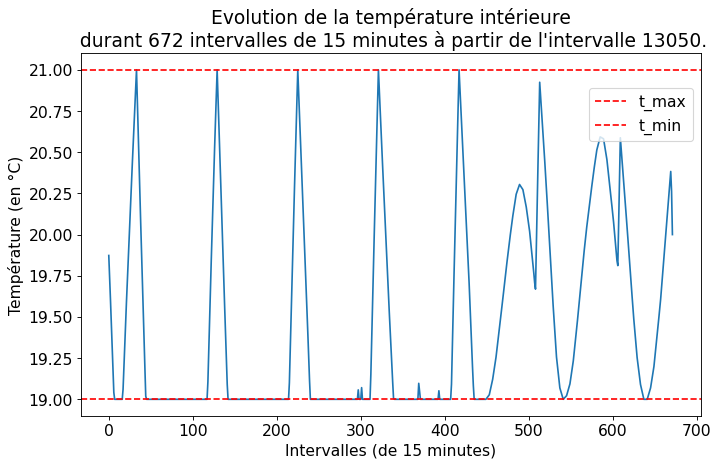

In [4]:
plt.rcParams.update({'font.size': 14})
title = f'Evolution de la température intérieure\n durant {size} intervalles de 15 minutes à partir de l\'intervalle {index}.'
filename = f'../part-1/graphs/task1_temp_graph_{index}.pdf'
temperature_graph(T.value, 19, 21, title, filename)

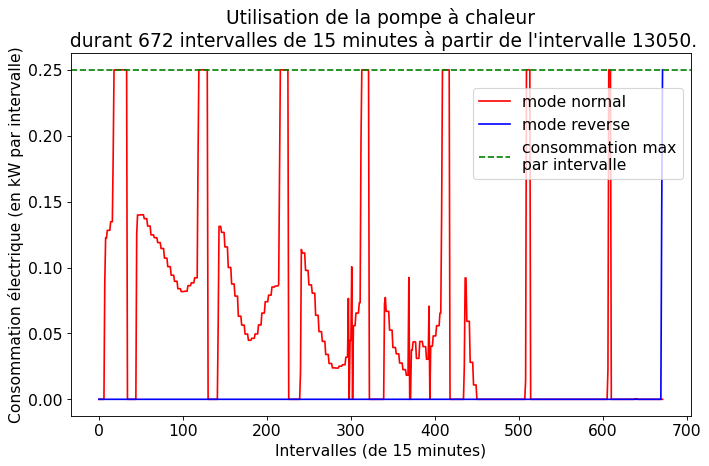

In [5]:
plt.rcParams.update({'font.size': 14})
title = f'Utilisation de la pompe à chaleur\n durant {size} intervalles de 15 minutes à partir de l\'intervalle {index}.'
filename = f'../part-1/graphs/task1_pump_graph_{index}.pdf'
pump_graph(Xn.value, Xr.value, title, filename)

**OPTIMISATION POUR INDEX = 23672 (début septembre)**

In [6]:
index_o = 23672
result_o, Xn_o, Xr_o, T_o, elapsed_time_o = task1(data_vector, index_o, size, 19, 21, 0.26, 0.18)


print(f'Temps de calcul (en secondes) : {np.around(elapsed_time_o, 3)}')
print(f'Coût minimal (en $) : {np.around(result_o, 4)}')
print(f'Total Energie (en kWh) pour chauffer : {np.around(np.sum(Xn_o.value),3)}')
print(f'Total Energie (en kWh) pour refroidir : {np.around(np.sum(Xr_o.value),3)}\n')
# print(f'Energie (en kWh) pour chauffer, par intervalle :\n{np.around(Xn_o.value, 3)}\n')
# print(f'Energie (en kWh) pour refroidir, par intervalle :\n{np.around(Xr_o.value, 3)}')

Temps de calcul (en secondes) : 1.035
Coût minimal (en $) : 1.9795
Total Energie (en kWh) pour chauffer : 2.94
Total Energie (en kWh) pour refroidir : 6.775



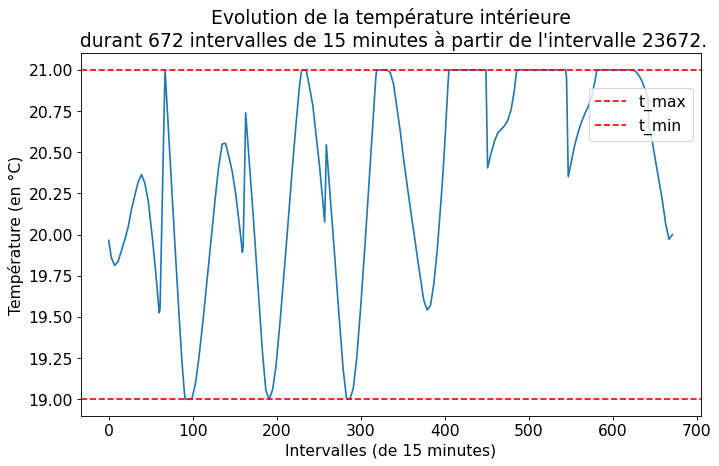

In [7]:
plt.rcParams.update({'font.size': 14})
title = f'Evolution de la température intérieure\n durant {size} intervalles de 15 minutes à partir de l\'intervalle {index_o}.'
filename = f'../part-1/graphs/task1_temp_graph_{index_o}.pdf'
temperature_graph(T_o.value, 19, 21, title, filename)

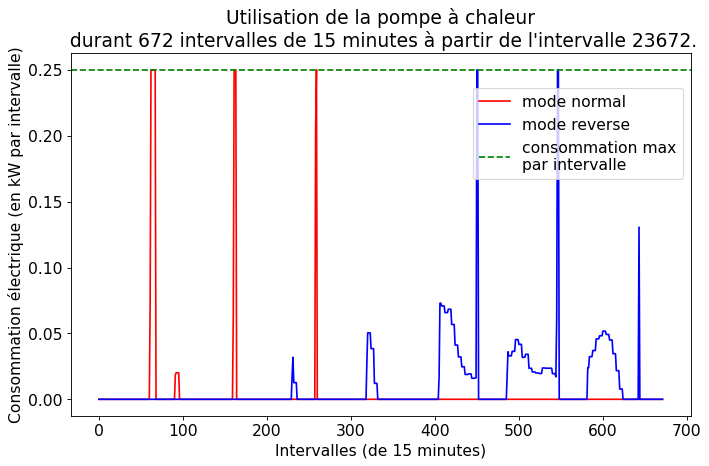

In [8]:
plt.rcParams.update({'font.size': 14})
title = f'Utilisation de la pompe à chaleur\n durant {size} intervalles de 15 minutes à partir de l\'intervalle {index_o}.'
filename = f'../part-1/graphs/task1_pump_graph_{index_o}.pdf'
pump_graph(Xn_o.value, Xr_o.value, title, filename)

<div class="alert alert-block alert-info"><b>Question 1.3</b> :<br> 
    A partir de certaines informations fournies par le solver (et donc sans effectuer de nouveau calcul) et de la théorie vue au cours, prédisez l'effet sur le coût optimal d'une diminution de la tempéature minimale admissible Tmin. Faites de même pour une augmentation de la température maximale admissible Tmax. 
    Votre prédiction consiste en un formule pour le coût optimal en fonction des deux variations de température Tmin et Tmax. Commentez cette prédiction (en particulier : est-elle valide pour n'importe quelle variation des températures ?).
</div>

#### Idée:

En transformant le problème primal sous la forme duale, on obtient la formulation linéaire (simplifiée) suivante: 

$$ \text{maximiser } \quad T_{min} * (t_{variation}(T_i, T_{ext, i}) - T_{max} * (t_{variation}(T_i, T_{ext, i}) + \text{autres contraintes devenant des variables)} $$

Si on se concentre sur les variables duales ayant $T_{min}$ comme coefficient, on a:

$$ T_{min} * (t_{variation}(T_i, T_{ext, i}) * y_{min,i})$$

où $y_{min_i}$ correspond à la variable en rapport avec la condition sur la température minimal au primal, pour l'intervalle $i$.

#### Formule pour $T_{min}$
Si $T_{min}$ devient $T_{min} - \epsilon$, le coût optimal devient $c^*_{new} = c^* - \epsilon *\sum{(t_{variation}(T_i, T_{ext, i})}$. 


#### Formule pour $T_{max}$
De façon similaire: 
Si $T_{max}$ devient $T_{max} + \epsilon$, le coût optimal devient $c^*_{new} = c^* - \epsilon *\sum{(t_{variation}(T_i, T_{ext, i})}$. Le signe moins reste car on à moins $T_{max}$ pour dans le coût optimal au dual. 

#### Commentaires
Ces deux formules sont valables pour autant que $\epsilon$ ne soit pas trop grand, autrement dit que le dual reste optimal et que le sommet primal reste admissible. Ce sera le cas tant que $B^{-1} (T_{min/max} \pm \epsilon) \geq 0$, non calculé ici.  

Le fait de relaxer un peu la contrainte aura comme effet de diminuer le coût optimal. 

<div class="alert alert-block alert-info"><b>Question 1.4</b> :<br> 
   Démontrez que, dans toute solution optimale de ce modèle, l'activation simultanée du chauffage et du mode reverse durant la même période de temps est impossible.
</div>

En raisonnant par l'absurde, imaginons que sur un intervalle donné, la pompe chauffe et refroidi simultanément. En faisant cela, elle annule elle même son propre impact (chauffer ou refroidir en fonction de la nécessité). Elle consomme donc des kWh inutilement, augmentant donc le coût inutilement. 

Hors, la fonction objectif étant une minimisation du coup de la pompe à chaleur, celle-ci devra donc consommer le minimum de kWh possible. Donc en minimisant le coût, la pompe à chaleur ne pourra chauffer et refroidir simultanement, mais choisira entre les deux modes celui qui correspond à la situation, si son fonctionnement est nécessaire. 

<div class="alert alert-block alert-info"><b>Question 1.5</b> :<br> 
    Modifiez votre modèle de façon à tenir compte des deux nouvelles contraintes suivantes :<br>
    - si la pompe à chaleur est utilisée (dans un mode ou dans l'autre), elle l'est au moins à 25% de sa puissance maximale. Il n'est donc plus possible d'utiliser la pompe à chaleur à très faible puissance.
<br>
    - si on décide d'allumer (ou d'éteindre) la pompe à chaleur, elle reste allumée (ou éteinte) sur une période de x heures consécutives. Ces périodes sont fixes : par exemple, si x=4h, il s'agit de [0h-4h], [4h-8h], [8h-12h], [12h-16h], etc. pour chaque journée.<br>
    Le nouveau modèle sera toujours obligatoirement linéaire, mais pourra faire appel à des variables discrètes. 
    Donnez votre formulation, et commentez brièvement.
</div>

In [18]:
MAX_POWER = 1
MIN_POWER = 0.25 * MAX_POWER

def q1_5(data, index, size, t_min, t_max, p_peak, p_off_peak, time_interval_hours = 0):
    t_ext = get_temp_data(data, index, size)
    prices = get_price_by_interval(index, size, p_peak, p_off_peak)

    Xn = cp.Variable(size)
    Xr = cp.Variable(size)

    Xn_on = cp.Variable(size, boolean=True)
    Xr_on = cp.Variable(size, boolean=True)

    T = cp.Variable(size)

    objective = cp.Minimize(prices @ Xn + prices @ Xr)

    # basic constraints
    
    constraints = [
        0 <= Xn,
        0 <= Xr,
        Xn >= MIN_POWER * Xn_on,
        Xn <= Xn_on,
        Xr >= MIN_POWER * Xr_on,
        Xr <= Xr_on,
    ]
    
    # initial temperature
    
    constraints.append(T[0] == get_end_temp((t_min + t_max)/2, t_ext[0]) 
        + get_var_temp_normal_mode(Xn[0], t_ext[0]) 
        - get_var_temp_reverse_mode(Xr[0]))

    # temperature constraints per following quarter hours

    for i in range(1, size):
        constraints.append(T[i] == get_end_temp(T[i-1], t_ext[i]) 
                           + get_var_temp_normal_mode(Xn[i], t_ext[i]) 
                           - get_var_temp_reverse_mode(Xr[i]))
    constraints.append(t_min <= T)
    constraints.append(T <= t_max)
    constraints.append(T[size-1] == (t_min + t_max)/2)

    # fixed time interval constraints
    
    if time_interval_hours:
        for i in range(0, size - 1, time_interval_hours * 4):
            for j in range(i, i + time_interval_hours * 4 - 1):
                constraints.append(Xn_on[j] == Xn_on[j + 1])
                constraints.append(Xr_on[j] == Xr_on[j + 1])
    
    prob = cp.Problem(objective, constraints)
    
    # Solve
    start_time = time.time()
    result = prob.solve(solver=cp.SCIPY, scipy_options={"method": "highs"})
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    return result, Xn, Xr, T, elapsed_time

<div class="alert alert-block alert-info"><b>Question 1.6</b> :<br> 
    Résolvez ce nouveau modèle, affichez les résultats et commentez (en particulier le temps de calcul). Choissisez d'abord une valeur x=4h, puis x=2h.
</div>

### Avec x = 4

In [19]:
index_o = 23672
result_o, Xn_o, Xr_o, T_o, elapsed_time_o = q1_5(data_vector, index_o, size, 19, 21, 0.26, 0.18, 4)

print(f'Temps de calcul (en secondes) : {np.around(elapsed_time_o, 3)}')
print(f'Coût minimal (en $) : {np.around(result_o, 4)}')
print(f'Total Energie (en kWh) pour chauffer : {np.around(np.sum(Xn_o.value), 3)}')
print(f'Total Energie (en kWh) pour refroidir : {np.around(np.sum(Xr_o.value), 3)}\n')

Temps de calcul (en secondes) : 9.113
Coût minimal (en $) : 20.4519
Total Energie (en kWh) pour chauffer : 42.861
Total Energie (en kWh) pour refroidir : 50.928



### Avec x = 2

In [20]:
index_o = 23672
result_o, Xn_o, Xr_o, T_o, elapsed_time_o = q1_5(data_vector, index_o, size, 19, 21, 0.26, 0.18, 2)

print(f'Temps de calcul (en secondes) : {np.around(elapsed_time_o, 3)}')
print(f'Coût minimal (en $) : {np.around(result_o, 4)}')
print(f'Total Energie (en kWh) pour chauffer : {np.around(np.sum(Xn_o.value), 3)}')
print(f'Total Energie (en kWh) pour refroidir : {np.around(np.sum(Xr_o.value), 3)}\n')

Temps de calcul (en secondes) : 156.957
Coût minimal (en $) : 10.1224
Total Energie (en kWh) pour chauffer : 20.321
Total Energie (en kWh) pour refroidir : 26.215



<div class="alert alert-block alert-info"><b>Question 1.7</b> :<br> 
    Décrivez comment on pourrait apporter les modifications suivantes au nouveau modèle de la Question 1.5, sans les implémenter : <br>
    (a) tenir compte d'un coût fixe supplémentaire à payer pour chaque intervalle de temps où la pompe à chaleur est utilisée<br>
    (b) empêcher le nombre total d'allumages de la pompe à chaleur à ne pas dépasser une certaine valeur maximale (un allumage = passage de l'état 'éteint' lors d'un invervalle de temps à l'état 'allumé' lors de l'intervalle de temps suivant)<br>
    (c) dans ce nouveau modèle il n'est plus nécessairement impossible d'observer dans une solution optimale l'activation simultanée du chauffage et du mode reverse au cours du même intervalle de temps : expliquez pourquoi, et proposez une contrainte permettant d'éliminer cette possibilité d'activation simultanée.
</div>

**Tâche 2** : on souhaite réduire le coût d'utilisation de la pompe à chaleur, et on va fixer le budget maximal à une certaine proportion du coût minimal identifié lors de la première tâche. Pour diminuer les coût, on va permettre aux températures de sortir de la plage admissible définie plus haut (on abandonne aussi la contrainte sur la température finale, qui devient libre). On va cependant alors comptabiliser la quantité d'_inconfort_ éventuellement subi durant chaque intervalle de temps, qui sera proportionnel au dépassement de la température maximale admissible, ou au dépassement par le bas de la température minimale admissible. On cherche alors à **minimiser l'inconfort total** (somme des inconforts sur toute la période considérée) **tout en respectant la contrainte de budget**. Formulez ce problème comme un problème d'optimisation linéaire, puis résolvez le.


<div class="alert alert-block alert-warning"><b>A mentionner</b> :<br> 
- inconfort minimal + même graphiques que pour tâche 1 + temps de calcul + bref commentaire (maximum 4 lignes)<br>
- à nouveau pour les deux périodes mentionnées lors de la tâche 1
</div>

---

#### Commentaires: 
Nous observons que pour respecter la contrainte de budget, la pompe à chaleur fonctionne au maximum de sa capacité à la fin des heures creuses, pour les mêmes raisons qu'énoncées à la tâche 1. Nous remarquons la formation de paliers en heures pleines afin de limiter l'inconfort quand la température est trop extrême. Nous remarquons aussi que l'inconfort a tendance à être plus faible pour les saisons aux températures moins extrêmes. 

<div class="alert alert-block alert-info"><b>Question 2.1</b> :<br> 
    Donnez votre formulation linéaire, en commentant brièvement (en particulier si vous utilisez une technique de modélisation/reformulation).
</div>

Pour la tâche 2, on va devoir adapter les contraines et la fonction objectif du problème.

## Fonction objectif

Nous souhaitons désormais **minimiser l'inconfort total** sous contraintes d'un budget maximal. Sous notation mathématique, la fonction objectif s'écrit comme:
$$ minimiser \;\; ( max  (T_{min} - T, 0) * inconfort_{inférieur} +  max (T - T_{max}, 0) * inconfort_{supérieur}) $$

où: 
- $max$ est la fonction mathématique qui prend le maximum entre 2 valeurs (et pas une maximisation au sens d'optimisation).
- $inconfort_{inférieur}$ est l'inconfort par degré en dessous de $T_{min}$ par intervalle.
- $inconfort_{supérieur}$ est l'inconfort par degré au dessus de $T_{max}$ par intervalle.

## Contraintes

On garde les contraintes de la tâches hormis celles sur la plage de températures admissible. On retire donc:
$$ T_{min} \leq T \leq T_{max}$$

On retire aussi celle sur la température finale du dernier intervalle (cf. consignes), car elle risque de ne pas être satisfaite pour un budget alloué trop faible. On retire donc: 
$$ T[671] = \frac{(T_{max}+T_{min})}{2}$$

Par ailleurs, on ajoute la contrainte relative au budget maximal alloué:
$$ \sum_{i=1}^{672} p * (X_N + X_R) \leq Budget_{max} $$

<div class="alert alert-block alert-info"><b>Question 2.2</b> :<br> 
    Résolvez votre modèle sur les deux intervalles de temps, affichez vos résultats sous forme graphique et commentez.modélisation/reformulation)  
</div>

In [9]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import time

def task2(data, index, size, t_min, t_max, p_peak, p_off_peak, discomfort_bot, discomfort_top, percentage, min_cost):
    # Problem data
    t_ext = get_temp_data(data, index, size)
    prices = get_price_by_interval(index, size, p_peak, p_off_peak)
    if(not isinstance(percentage, list) and not isinstance(percentage,  np.ndarray)):
        percentage = [percentage]
   
    # Variables
    Xn = cp.Variable(size)
    Xr = cp.Variable(size)
    T = cp.Variable(size)
    budget_max = cp.Parameter()
    
    # Objectif
    objective = cp.Minimize(
        cp.sum(cp.maximum(t_min - T, 0)) * discomfort_bot +
        cp.sum(cp.maximum(T - t_max, 0)) * discomfort_top
    )
    
    
    # Constraints
    constraints = [
        0 <= Xn,
        0 <= Xr,
        Xn + Xr <= 0.25,
        prices @ Xn + prices @ Xr <= budget_max,
        T[0] == get_end_temp((t_min + t_max)/2, t_ext[0]) 
        + get_var_temp_normal_mode(Xn[0], t_ext[0]) 
        - get_var_temp_reverse_mode(Xr[0])
    ]

    for i in range(size-1):
        constraints.append(T[i+1] == get_end_temp(T[i], t_ext[i+1]) 
                           + get_var_temp_normal_mode(Xn[i+1], t_ext[i+1]) 
                           - get_var_temp_reverse_mode(Xr[i+1]))
        
    # Problem
    prob = cp.Problem(objective, constraints)
    
    # Results
    discomforts = []
    Xns = []
    Xrs = [] 
    Ts = []
    elapsed_times = []
    
    # Solve
    for i in range(len(percentage)):
        budget_max.value = percentage[i] * min_cost
        
        start_time = time.time()
        discomfort = prob.solve(solver=cp.SCIPY, scipy_options={"method": "highs"}, warm_start=True)
        end_time = time.time()
        elapsed_time = end_time - start_time
        
        discomforts.append(discomfort)
        Xns.append(Xn.value)
        Xrs.append(Xr.value)
        Ts.append(T.value)
        elapsed_times.append(elapsed_time)
    
    return discomforts, Xns, Xrs, Ts, elapsed_times

**OPTIMISATION POUR INDEX = 13050 (mi-mai)**

In [11]:
import numpy as np

index = 13050
minimal_cost = np.around(result, 4)
ratio = 0.7
result2, Xn2, Xr2, T2, elapsed_time2 = task2(data_vector, index, size, 19, 21, 0.26, 0.18, 3, 1, ratio, minimal_cost)


print(f'Temps de calcul (en secondes) : {np.around(elapsed_time2[0], 3)}')
print(f'Inconfort minimal : {np.around(result2[0], 4)}')
print(f'Total Energie (en kWh) pour chauffer : {np.around(np.sum(Xn2[0]),3)}')
print(f'Total Energie (en kWh) pour refroidir : {np.around(np.sum(Xr2[0]),3)}\n')
# print(f'Energie (en kWh) pour chauffer, par intervalle :\n{np.around(Xn2.value, 3)}\n')
# print(f'Energie (en kWh) pour refroidir, par intervalle :\n{np.around(Xr2.value, 3)}')

Temps de calcul (en secondes) : 1.537
Inconfort minimal : 1773.974
Total Energie (en kWh) pour chauffer : 31.82
Total Energie (en kWh) pour refroidir : 0.0



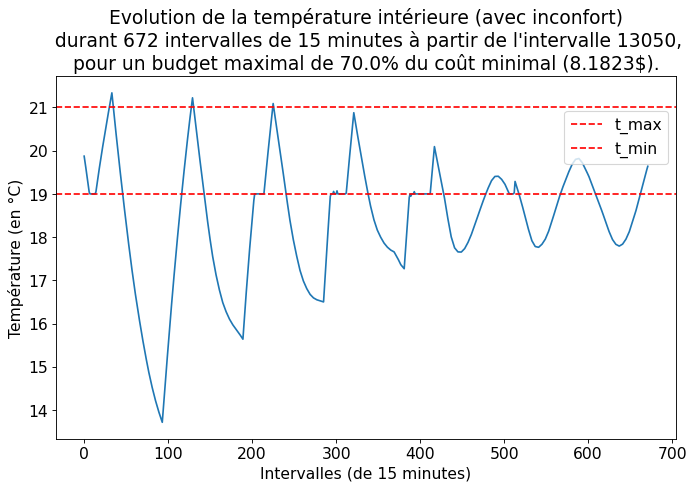

In [12]:
plt.rcParams.update({'font.size': 14})
title = f'Evolution de la température intérieure (avec inconfort)\n durant {size} intervalles de 15 minutes à partir de l\'intervalle {index},\npour un budget maximal de {ratio*100}% du coût minimal ({minimal_cost}\$).'
filename = f'../part-1/graphs/task2_temp_graph_{index}.pdf'
temperature_graph(T2[0], 19, 21, title, filename)

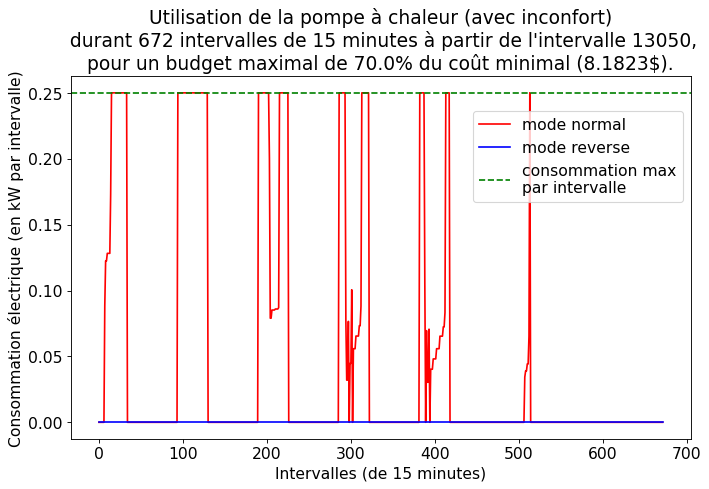

In [13]:
plt.rcParams.update({'font.size': 14})
title = f'Utilisation de la pompe à chaleur (avec inconfort)\n durant {size} intervalles de 15 minutes à partir de l\'intervalle {index},\npour un budget maximal de {ratio*100}% du coût minimal ({minimal_cost}\$).'
filename = f'../part-1/graphs/task2_pump_graph_{index}.pdf'
pump_graph(Xn2[0], Xr2[0], title, filename)

**OPTIMISATION POUR INDEX = 23672 (début septembre)**

In [14]:
import numpy as np

index_o = 23672
minimal_cost_o = np.around(result_o, 4)
ratio_o = 0.7
result_o2, Xn_o2, Xr_o2, T_o2, elapsed_time_o2 = task2(data_vector, index_o, size, 19, 21, 0.26, 0.18, 3, 1, ratio_o, minimal_cost_o)



print(f'Temps de calcul (en secondes) : {np.around(elapsed_time_o2[0], 3)}')
print(f'Inconfort minimal : {np.around(result_o2[0], 4)}')
print(f'Total Energie (en kWh) pour chauffer : {np.around(np.sum(Xn_o2[0]),3)}')
print(f'Total Energie (en kWh) pour refroidir : {np.around(np.sum(Xr_o2[0]),3)}\n')
# print(f'Energie (en kWh) pour chauffer, par intervalle :\n{np.around(Xn2.value, 3)}\n')
# print(f'Energie (en kWh) pour refroidir, par intervalle :\n{np.around(Xr2.value, 3)}')

Temps de calcul (en secondes) : 1.544
Inconfort minimal : 85.6154
Total Energie (en kWh) pour chauffer : 2.31
Total Energie (en kWh) pour refroidir : 5.351



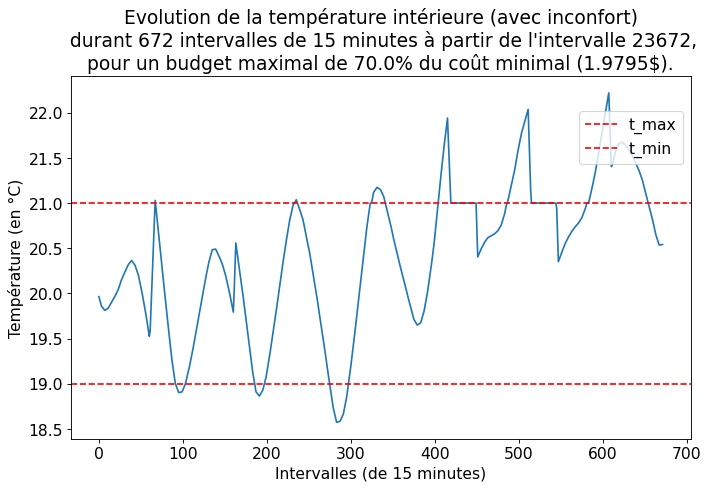

In [15]:
plt.rcParams.update({'font.size': 14})
title = f'Evolution de la température intérieure (avec inconfort)\n durant {size} intervalles de 15 minutes à partir de l\'intervalle {index_o},\npour un budget maximal de {ratio_o*100}% du coût minimal ({minimal_cost_o}\$).'
filename = f'../part-1/graphs/task2_temp_graph_{index_o}.pdf'
temperature_graph(T_o2[0], 19, 21, title, filename)

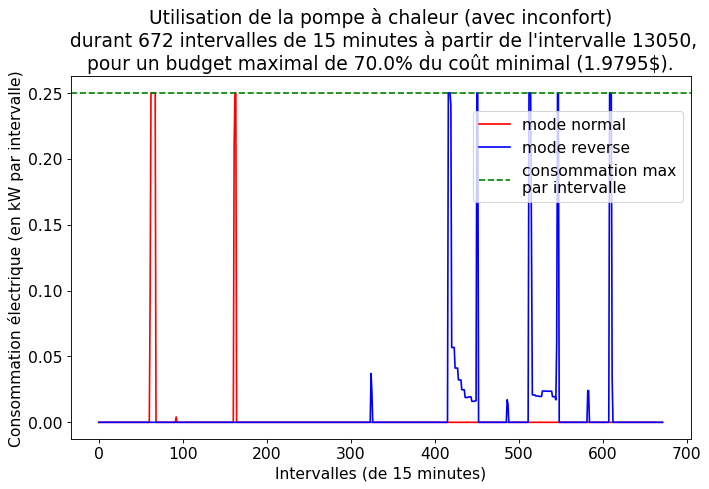

In [16]:
plt.rcParams.update({'font.size': 14})
title = f'Utilisation de la pompe à chaleur (avec inconfort)\n durant {size} intervalles de 15 minutes à partir de l\'intervalle {index},\npour un budget maximal de {ratio_o*100}% du coût minimal ({minimal_cost_o}\$).'
filename = f'../part-1/graphs/task2_pump_graph_{index_o}.pdf'
pump_graph(Xn_o2[0], Xr_o2[0], title, filename)

On remplace à présent la notion d'inconfort décrite ci-dessus par une pénalisation quadratique : à présent l'inconfort  est proportionnel au *carré* du dépassement de la température maximale admissible, ou au *carré* du dépassement par le bas de la température minimale admissible (les coefficients de proportionnalité restent identiques).

<div class="alert alert-block alert-info"><b>Question 2.3</b> :<br> 
    Modélisez ce nouveau problème de façon linéaire, en utilisant une approximation. Cette approximation pourra par exemple être basée sur des tangentes  (choisissez un nombre pas trop élevé, par exemple 5). Expliquez votre technique de modélisation. Résolvez ce modèle approché, affichez les solutions et commentez (en particulier l'effet sur la solution par rapport au modèle d'inconfort initial).
</div>

<div class="alert alert-block alert-info"><b>Question 2.4</b> :<br> 
    Pour terminez cette partie, résolvez encore une fois ce nouveau modèle, mais cette fois de façon exacte, en utilisant un solveur quadratique. Comparez avec la solution approchée obtenue précédemment (allure de la solution, temps de calcul).
</div>

**Tâche 3** : on voudrait à présent mieux comprendre le compromis qui existe entre le budget alloué et l'inconfort total qui en résulte. Proposez un **graphique représentant au mieux cette relation entre budget et inconfort**, où on fera varier le budget entre entre zéro et le coût minimal identifié lors de la tâche 1 (ce budget sera indiqué en pourcentage, de 0 à 100%). Ceci nécessitera la résolution de plusieurs problèmes, et il sera judicieux d'utiliser la fonctionnalité _warm start_ du solver pour accélérer les calculs.

<div class="alert alert-block alert-warning"><b>A mentionner</b> :<br> 
- graphique demandé + temps de calcul (total et moyenne par problème) + bref commentaire (maximum 4 lignes)<br>
- à nouveau pour les deux périodes mentionnées  lors des tâches 1 et 2
</div>

---

<div class="alert alert-block alert-info"><b>Question 3.1</b> :<br> 
    Fournissez le graphique et les commentaires demandé ci-dessus
</div>

#### Commentaires
- **Temps de calcul total :** 10.140 secondes (index=13050) et 7.948 (index=23672)
- **Temps de calcul moyen :** 0,100 seconde (index=13050) et 0.079 (index=23672)
Commentaires :

Pour les deux index, la courbe du graphe est similaire. Nous pouvons remarquer que pour un budget maximal : 

- inférieur à (environs) $65\%$ du coût minimal, l'inconfort a tendance à croître rapidement.
- entre $65\%$ et $97\%$ du coût minimal, l'inconfort croît moins rapidement. 
- proche de $100\%$, l'inconfort généré est très faible.

    

In [17]:
import numpy as np

def task3(data, index, size, t_min, t_max, p_peak, p_off_peak, discomfort_bot, discomfort_top, minimal_cost):
    percentages = np.arange(0, 1.01, 0.01)
    discomforts, _, _, _, elapsed_times = task2(data, index, 
                                                size, 
                                                t_min, 
                                                t_max, 
                                                p_peak, 
                                                p_off_peak, 
                                                discomfort_bot, 
                                                discomfort_top, 
                                                percentages, 
                                                minimal_cost)
    return discomforts, elapsed_times

In [ ]:
index = 13050
minimal_cost = np.around(result, 4)
Ds, Times = task3(data_vector, index, size, 19, 21, 0.26, 0.18, 3, 1, minimal_cost)


print(f'Temps de calcul total (en secondes) : {np.sum(np.array(Times))}')
print(f'Temps de calcul moyen (en secondes) : {np.mean(np.array(Times))}')

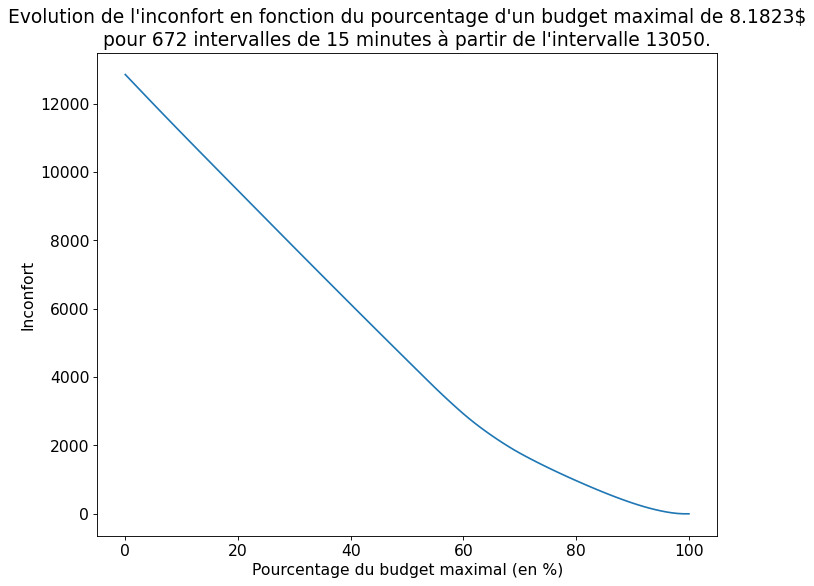

In [20]:
plt.rcParams.update({'font.size': 14})
title = f'Evolution de l\'inconfort en fonction du pourcentage d\'un budget maximal de {minimal_cost}$\npour {size} intervalles de 15 minutes à partir de l\'intervalle {index}.'
filename = f'../part-1/graphs/task3_discomfort_graph_{index}.pdf'
discomfort_graph(Ds, title, filename)

**OPTIMISATION POUR INDEX = 23672 (début septembre)**

In [24]:
index_o = 23672
minimal_cost_o = np.around(result_o, 4)
Ds_o, Times_o = task3(data_vector, index_o, size, 19, 21, 0.26, 0.18, 3, 1, minimal_cost_o)


print(f'Temps de calcul total (en secondes) : {np.sum(np.array(Times_o))}')
print(f'Temps de calcul moyen (en secondes) : {np.mean(np.array(Times_o))}')

Temps de calcul total (en secondes) : 8.528704643249512
Temps de calcul moyen (en secondes) : 0.08444262023019318


<div class="alert alert-block alert-info"><b>Question 3.2</b> :<br> 
    Expliquez la pente linéaire observée dans une grande partie du graphique obtenu. Recalculez la valeur de la pente à partir des informations fournies par le solver pour la résolution avec le budget maximal (tâche 2 initiale, Question 2.2), et comparez à celle du graphique. Enfin, expliquez pourquoi le graphique cesse à un moment d'être une droite.
</div>

Pour un budget inférieur ou égal à approximativement $60\%$ du budget optimal/maximal, on observe un pente linéaire. Ceci s'explique par le fait que le budget alloué étant trop faible, le pompe ne va pas être en mesure de compenser la variation de température due à l'extérieur, et ce de façon cumulative. La température étant en dehors des plages admises ($T_{min}, T_{max}$), la pompe va rentabiliser le peux de budget qu'elle a et ne chauffer que la nuit (quand le kWh coute moins cher). A force de rajouter du budget (jusqu'à atteindre approximativement $60\%$), la pompe pourra chauffer en heure creuse plus longtemps afin de diminuer l'inconfort, se qui donne une pente linéaire.



À partir de $60\%$ de budget, la pompe peut commencer à anticiper les températures futures et donc à chauffer plus en heures creuses afin de palier à une partie des variations de température en heures pleines. Avec un budget suffisant, elle pourra aussi chauffer en heures pleines pour diminuer l'inconfort. Ceci explique la deuxième partie du graphe, la courbure indique que la pompe arrive à atteindre la plage admissible  et à s'y maintenir temporairement.

---


<div class="alert alert-block alert-info"><b>Bonus</b><br>
    Estimez l'effet de l'utilisation d'une version imprécise des données de température (prévisions)<br>
</div>
Ce bonus est optionnel, et ne conduit pas à l'obtention de points supplémentaires : il est seulement destiné à attirer votre
    attention sur le caractère artificiel de la situation proposée, où on connaît parfaitement et à l'avance les températures extérieures.

## Consignes et conseils
- Le projet se réalise par groupe de (maximum) quatre étudiants (cf. groupes constitués sur Moodle). 

- L'assistant responsable du projet est Guillaume Van Dessel. Toutes les  questions sur le projet doivent être posées via Moodle dans le forum prévu pour le projet (et pas par message/mail individuel). Des permanences seront prévues, et seront annoncées via Moodle.

- Il est fortement suggéré d'utiliser un langage de modélisation pour formuler et résoudre vos problèmes d'optimisation linéaire. Nous conseillons d'utiliser le module CVXPY combiné au solver d'optimisation HIGHS (nous avons vérifié que cette combinaison est suffisamment performance pour le projet).

- Les groupes peuvent échanger leurs réflexions, partager leurs idées et comparer leurs résultats. Ils ne peuvent pas recopier les raisonnements, les solutions ou les codes informatiques. L'utilisation de toute information ou aide extérieure doit obligatoirement être mentionnée dans le rapport, en citant la source.

- Votre rapport final sera constitué de ce notebook complété, où vous aurez inséré vos codes, vos résultats, vos graphiques et commentaires.

- Ce rapport  est à remettre au plus tard le **mercredi 24 mai 2023** à minuit (soir), via Moodle, sous la forme d'une archive compressée contenant votre notebook et tous les fichiers nécessaires pour le faire fonctionner (code Python, etc.). Le notebook doit contenir les cellules sous forme déjà évaluée (résultats, tableaux, graphiques, etc.), mais doit pouvoir également être ré-évalué en entier. 

- Organisez efficacement votre travail de groupe, et répartissez vous le travail. Les tâches à effectuer durant cette seconde partie sont *largement indépendantes* les unes des autres.


### Changelog
- 2023-03-24 v1
- 2023-04-23 v1.1 avec récapitulatif des précisions apportées sur Moodle (en bleu)
- 2023-04-28 description des tâches de la seconde partie
- 2023-05-12 v2 avec le format attendu (notebook) pour le rapport final
- 2023-05-12 v2.1 précisions supplémentaire pour quelques questions